In [95]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [96]:
data = pd.read_csv('./Downloads/Car_sales2.csv')

In [97]:
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Sales_Date,Power_perf_factor
0,Acura,Integra,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2019,58.280150
1,Acura,TL,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2018,91.370778
2,Acura,CL,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2019,NaN
3,Acura,RL,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2018,91.389779
4,Audi,A4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2018,62.777639


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Price_in_thousands   155 non-null    float64
 5   Engine_size          156 non-null    float64
 6   Horsepower           156 non-null    float64
 7   Wheelbase            156 non-null    float64
 8   Width                156 non-null    float64
 9   Length               156 non-null    float64
 10  Curb_weight          155 non-null    float64
 11  Fuel_capacity        156 non-null    float64
 12  Fuel_efficiency      154 non-null    float64
 13  Sales_Date           157 non-null    object 
 14  Power_perf_factor    155 non-null    float64
dtypes: float64(12), object(3)
memory usage: 

In [99]:
data.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Sales_Date              0
Power_perf_factor       2
dtype: int64

In [100]:
data['Sales_Date'] = pd.to_datetime(data['Sales_Date'])
data['Year'] = data['Sales_Date'].dt.year
data['Month'] = data['Sales_Date'].dt.month
data['Day'] = data['Sales_Date'].dt.day

In [101]:
data.head(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Sales_Date,Power_perf_factor,Year,Month,Day
0,Acura,Integra,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2019-02-02,58.280150,2019,2,2
1,Acura,TL,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2018-06-03,91.370778,2018,6,3
2,Acura,CL,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2019-01-04,NaN,2019,1,4
3,Acura,RL,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2018-03-10,91.389779,2018,3,10
4,Audi,A4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2018-10-08,62.777639,2018,10,8


In [102]:
data = data.dropna()

In [103]:
data['Sales_Date'] = pd.to_datetime(data['Sales_Date']).dt.dayofyear 

In [104]:
data = data.fillna(0) 


In [105]:
X = data[['Power_perf_factor','Sales_Date']]
y = data['Sales_in_thousands']

In [106]:
y = y.astype(float)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
# Chuyển đổi cột 'Sale Date' sang kiểu dữ liệu ngày
data['Sales_Date'] = pd.to_datetime(data['Sales_Date'])

# Lưu dữ liệu đã chuyển đổi vào file CSV
data.to_csv('Car_sales2.csv', index=False)


In [111]:
import pandas as pd

# Đọc file CSV
data = pd.read_csv('./Downloads/Car_sales2.csv')

# Chuyển đổi cột chứa giá trị ngày/tháng/năm sang kiểu dữ liệu ngày
data['Sales_Date'] = pd.to_datetime(data['Sales_Date'])

# Chuyển đổi cột giá trị ngày sang dạng số nguyên đại diện cho số ngày từ một ngày cố định (ví dụ: ngày đầu tiên trong dữ liệu)
start_date = data['Sales_Date'].min()
data['Sales_Date'] = (data['Sales_Date'] - start_date).dt.days

# Chuyển đổi cột 'Latest_Launch' sang kiểu dữ liệu float
data['Sales_Date'] = data['Sales_Date'].astype(float)

# Lưu dữ liệu đã chuyển đổi vào file CSV
data.to_csv('Car_sales2.csv', index=False)

In [112]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [113]:
y_pred = model.predict(X_test)

In [114]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 7150.673886474761


In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [117]:
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S)

In [123]:
data['Sales_Date'] = data['Sales_Date'].astype(float)
data['Sales_in_thousands'] = data['Sales_in_thousands'].astype(float)
data['Price_in_thousands'] = data['Price_in_thousands'].astype(float)

Text(0.5, 1.0, 'Original data chart')

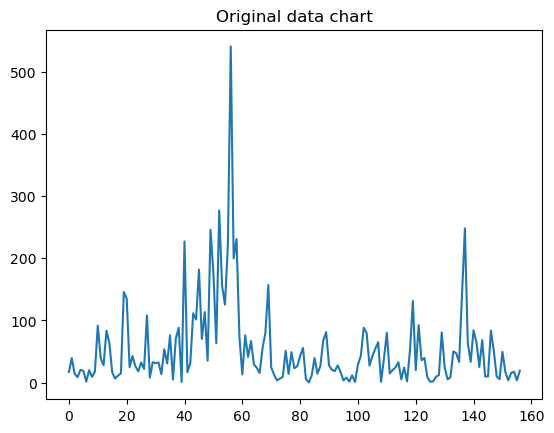

In [155]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ dữ liệu gốc
plt.plot(data.index, data['Sales_in_thousands'], label='Actual')
plt.title('Original data chart')

In [128]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [139]:
data = data.drop("Model", axis=1)

In [141]:
data_univariate = data["Sales_in_thousands"]

In [143]:
data_univariate = data['Sales_in_thousands']
model = SARIMAX(data_univariate, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

In [146]:
forecast = model_fit.predict(start=len('Sales_in_thousands'), end=len('Sales_in_thousands')+len('Price_in_thousands')-1, dynamic=True)

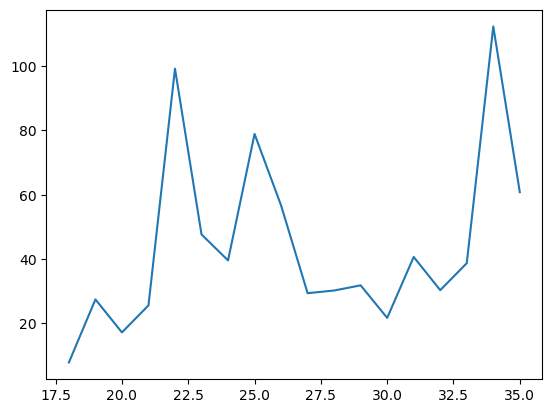

In [148]:
plt.plot(forecast.index, forecast, label='Forecast')

In [153]:
forecast = model_fit.get_forecast(steps=100)  # Số bước dự báo, ví dụ: 10 bước tiếp theo
predicted_mean = forecast.predicted_mean
confidence_interval = forecast.conf_int()

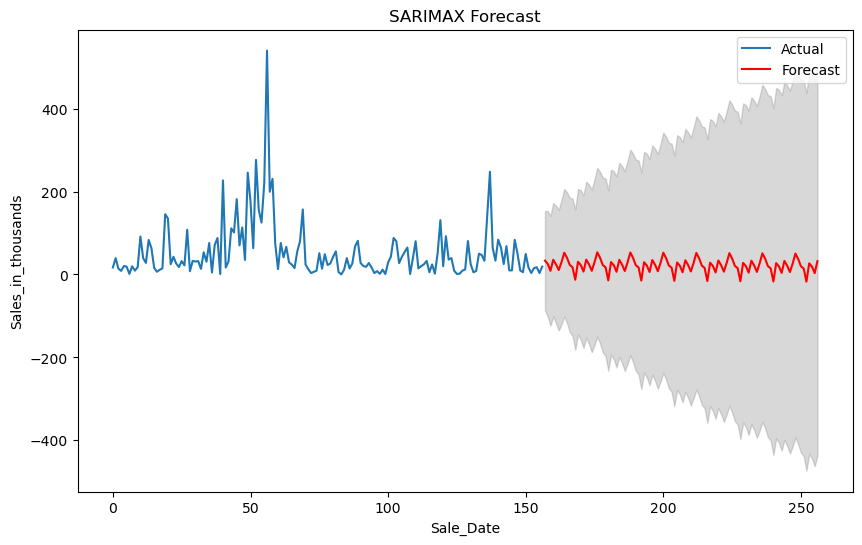

In [154]:
plt.figure(figsize=(10, 6))
plt.plot(data_univariate.index, data_univariate, label='Actual')  # Biểu đồ dữ liệu thực tế
plt.plot(predicted_mean.index, predicted_mean, color='red', label='Forecast')  # Biểu đồ dự báo
plt.fill_between(confidence_interval.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='gray', alpha=0.3)  # Vùng tin cậy
plt.xlabel('Sale_Date')
plt.ylabel('Sales_in_thousands')
plt.title('SARIMAX Forecast')
plt.legend()
plt.show()
